In [2]:
import pandas as pd
import numpy as np

# Load datasets
wells_df = pd.read_csv("spe_africa_dseats_datathon_2025_wells_dataset.csv")
reservoir_df = pd.read_csv("reservoir_info.csv")
class_params_df = pd.read_csv("classification_parameters.csv")

# Clean numeric columns in reservoir_info
for col in [
    'Initial Reservoir Pressure (PSI)',
    'Bubble Point Pressure (PSI)',
    'Current Average Reservoir Pressure (PSI)',
    'Solution Gas-Oil-Ratio (SCF/BBL)',
    'Formation Volume Factor (RB/STB)'
]:
    reservoir_df[col] = (
        reservoir_df[col].astype(str)
        .str.replace(",", "")
        .str.replace('"', '')
        .astype(float)
    )

# Clean numeric columns in wells_df
numeric_cols = [
    'BOTTOMHOLE_FLOWING_PRESSURE (PSI)',
    'DOWNHOLE_TEMPERATURE (deg F)',
    'ANNULUS_PRESS (PSI)',
    'CHOKE_SIZE (%)',
    'WELL_HEAD_PRESSURE (PSI)',
    'WELL_HEAD_TEMPERATURE (deg F)',
    'CUMULATIVE_OIL_PROD (STB)',
    'CUMULATIVE_FORMATION_GAS_PROD (MSCF)',
    'CUMULATIVE_TOTAL_GAS_PROD (MSCF)',
    'CUMULATIVE_WATER_PROD (BBL)',
    'ON_STREAM_HRS'
]

for col in numeric_cols:
    wells_df[col] = (
        wells_df[col]
        .astype(str)
        .str.replace(",", "")
        .str.replace('"', '')
        .replace("NA", np.nan)
        .astype(float)
    )

# Convert PROD_DATE to datetime
wells_df["PROD_DATE"] = pd.to_datetime(wells_df["PROD_DATE"])

# Select first 20 wells
well_names = wells_df["WELL_NAME"].unique()[:20]

C:\Users\kokoe\AppData\Local\Temp\ipykernel_24260\748992306.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wells_df["PROD_DATE"] = pd.to_datetime(wells_df["PROD_DATE"])


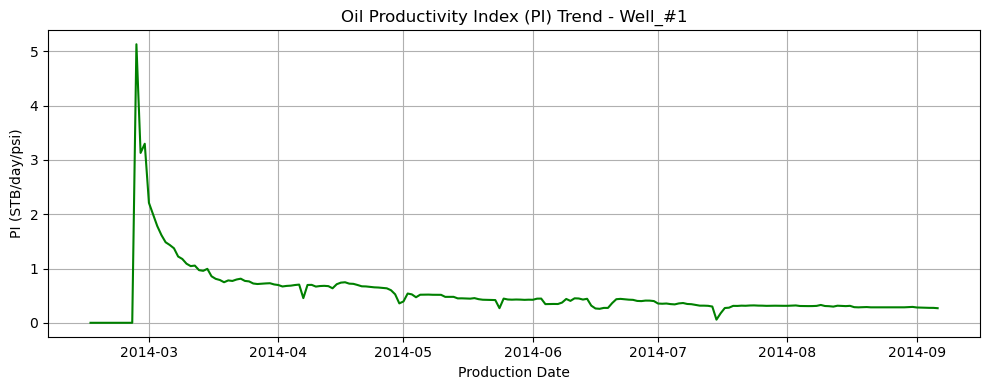

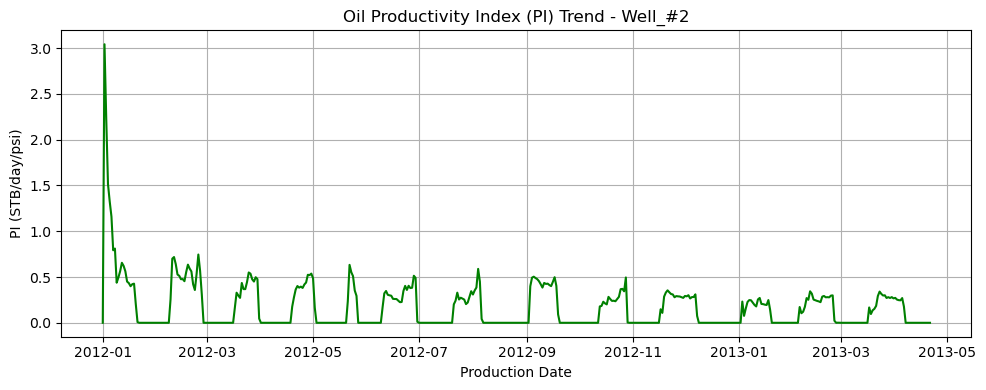

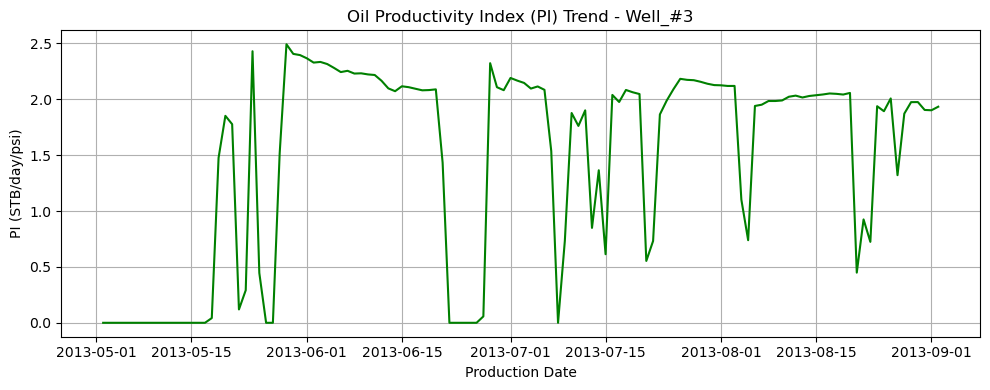

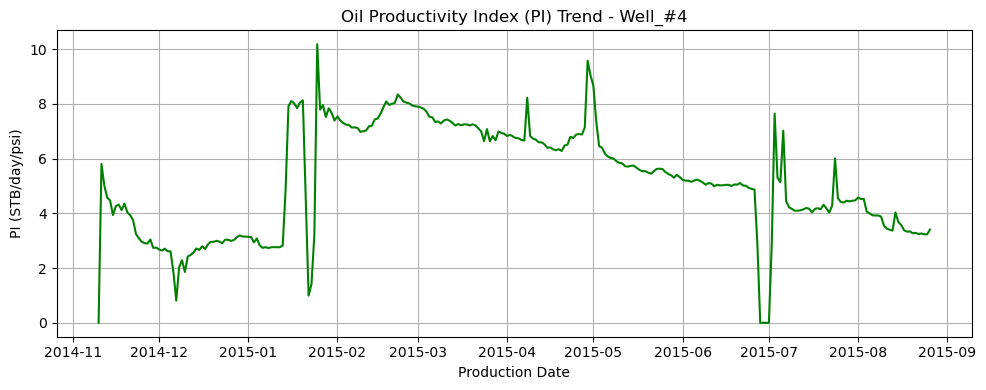

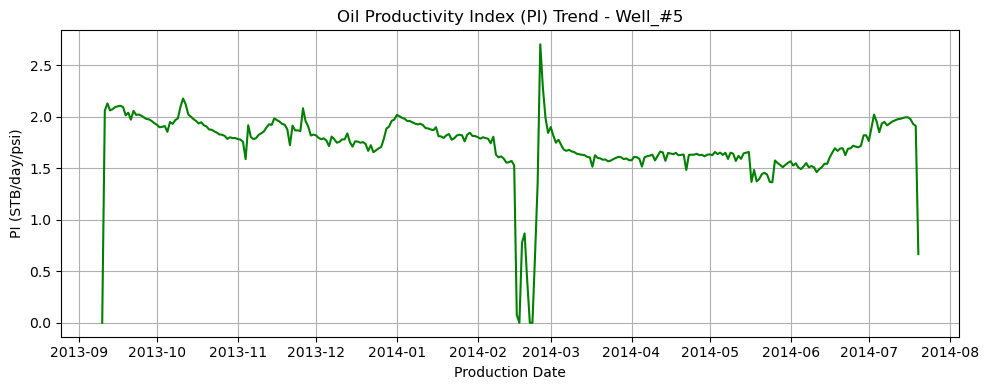

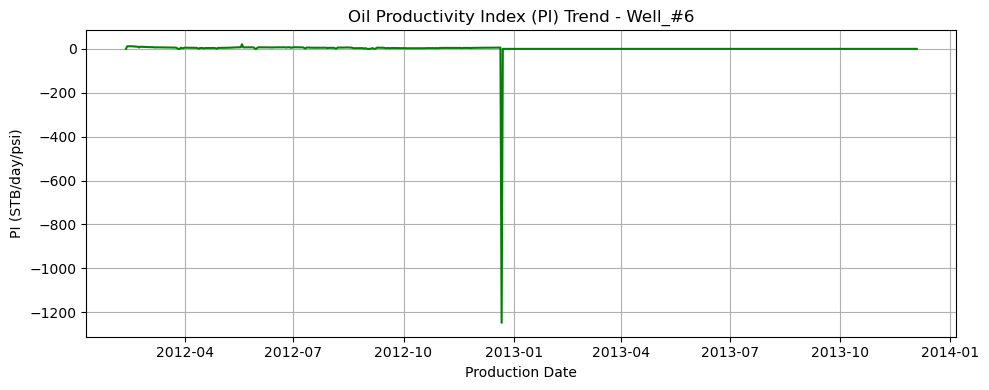

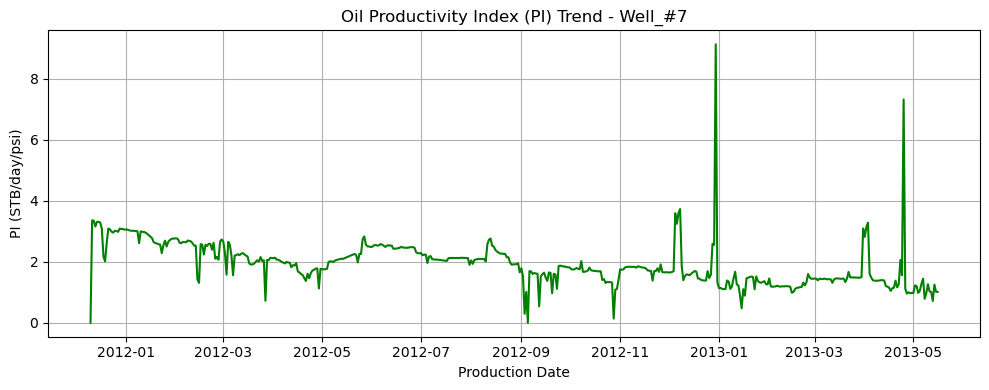

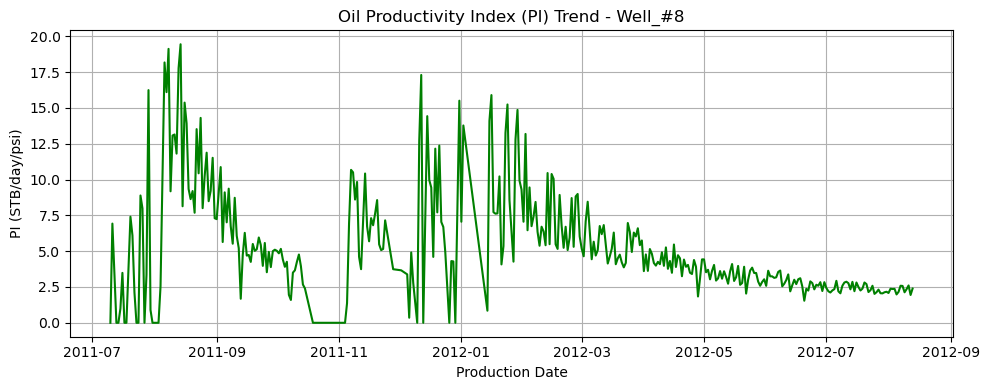

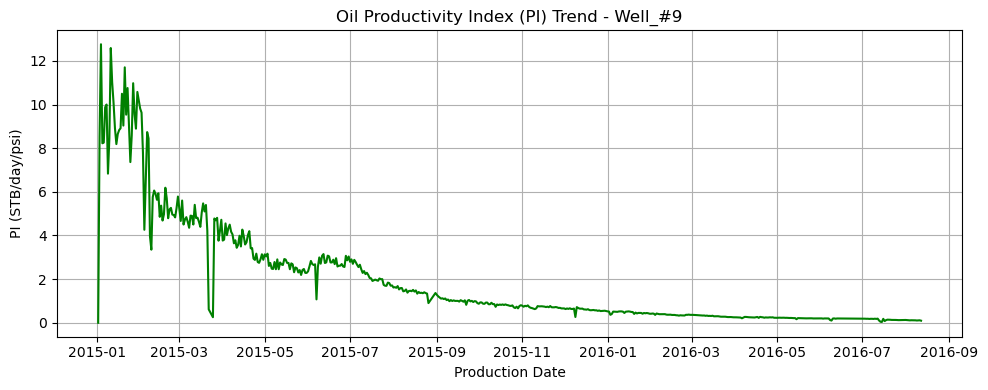

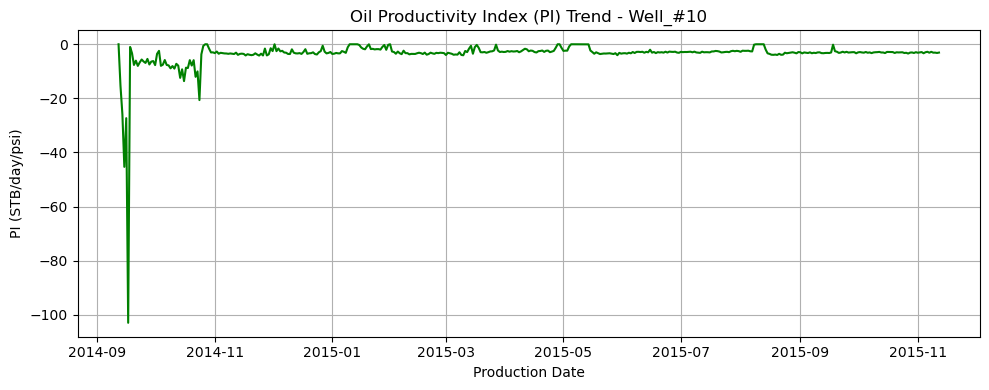

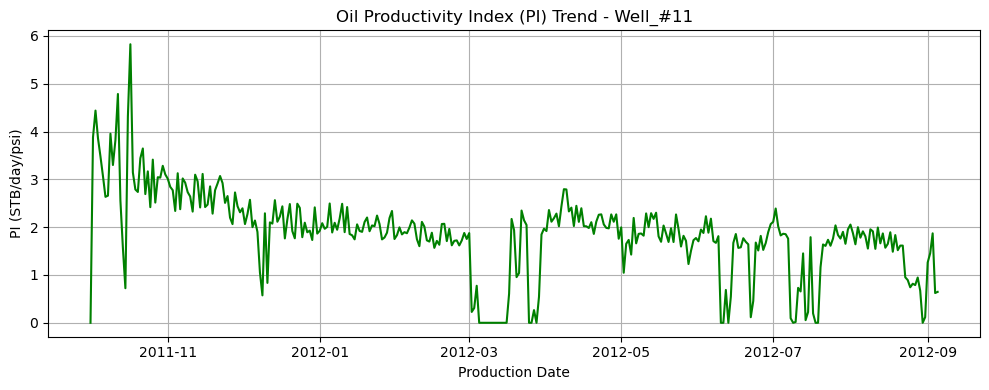

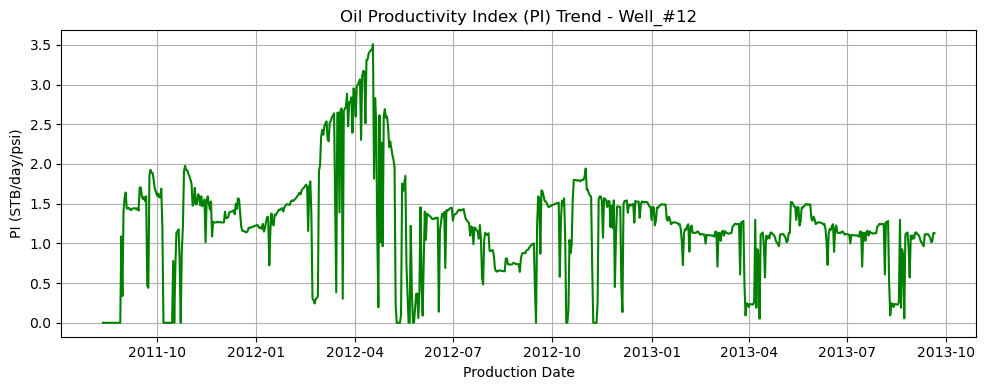

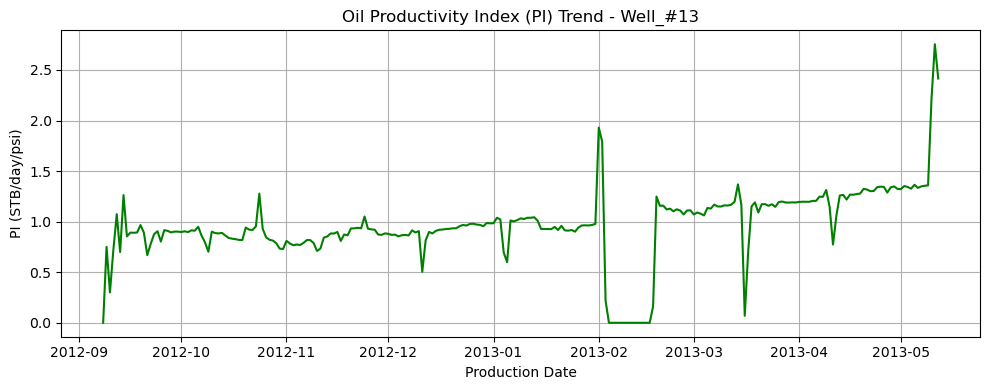

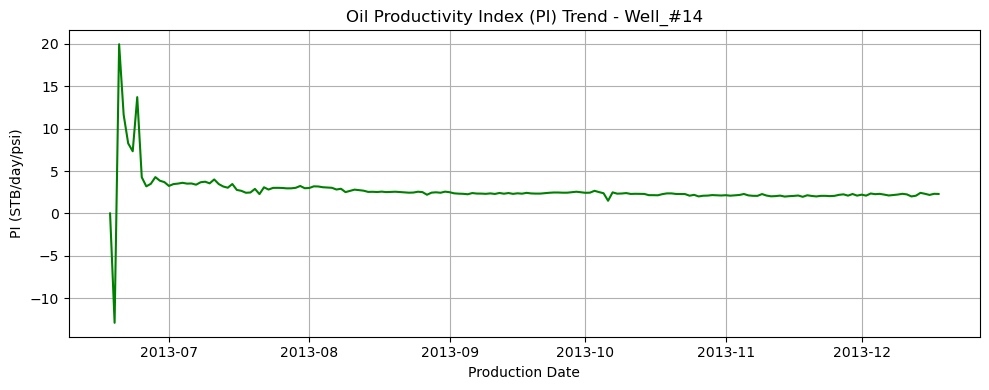

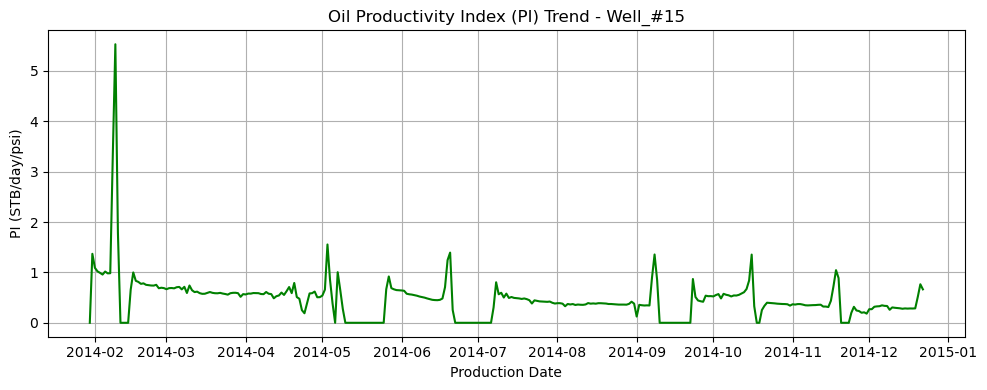

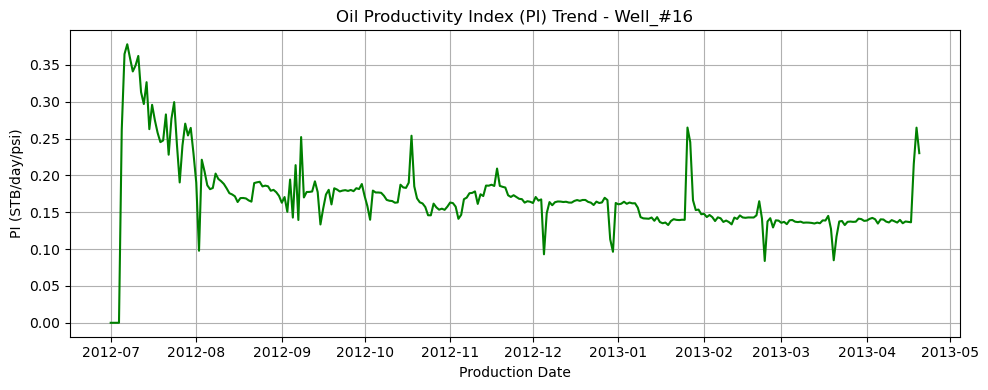

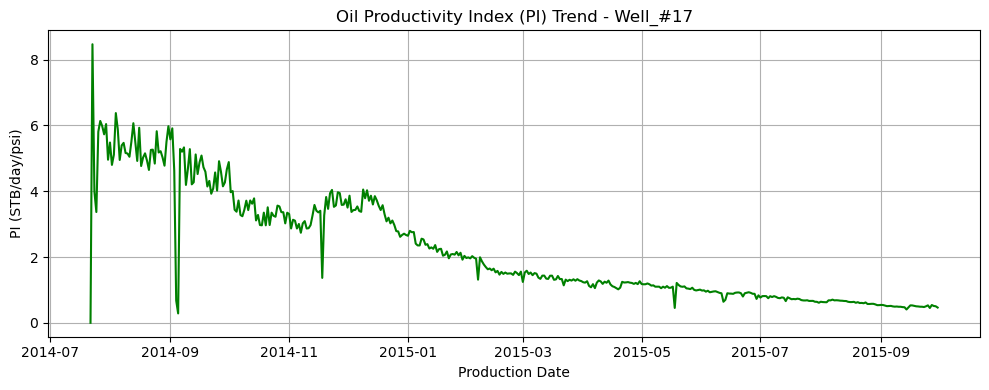

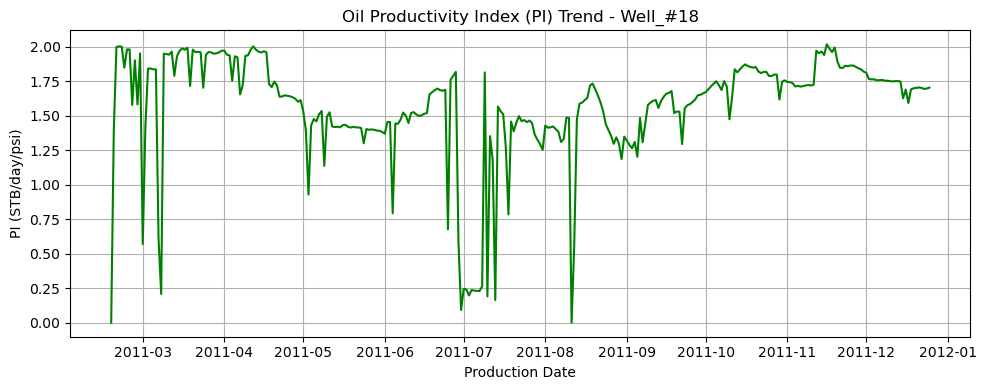

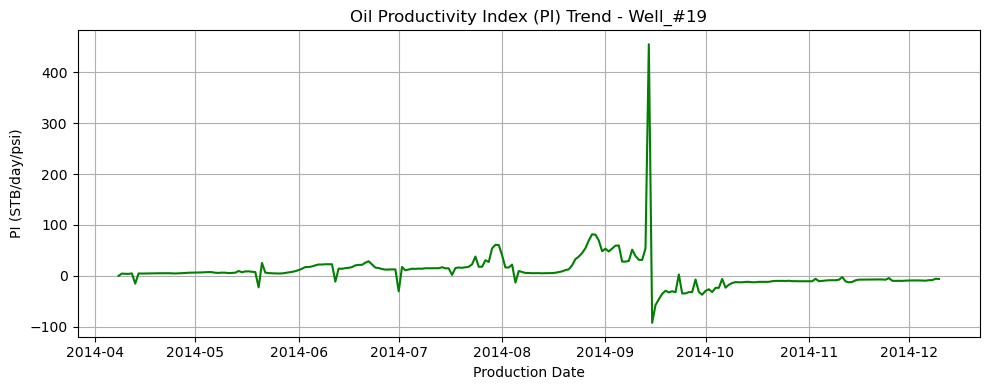

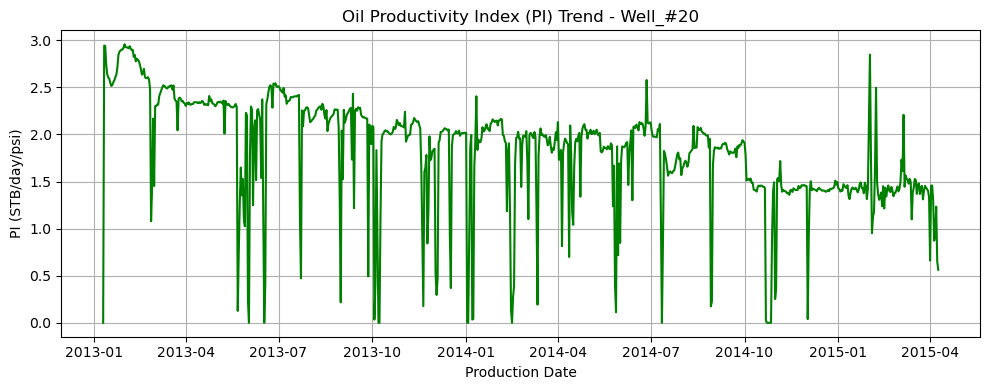

In [3]:
import matplotlib.pyplot as plt

# Loop through first 20 wells and plot PI over time
for well in well_names:
    df = wells_df[wells_df["WELL_NAME"] == well].copy()

    # Match with reservoir
    max_bhp = df['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'].max()
    matched = reservoir_df[np.abs(reservoir_df['Current Average Reservoir Pressure (PSI)'] - max_bhp) <= 200]
    if matched.empty:
        continue

    avg_res_press = matched.iloc[0]['Current Average Reservoir Pressure (PSI)']

    df["PROD_DATE"] = pd.to_datetime(df["PROD_DATE"], errors='coerce')
    df = df.sort_values("PROD_DATE")

    df["OIL_PROD"] = df["CUMULATIVE_OIL_PROD (STB)"].diff().fillna(0)
    df["PI"] = df["OIL_PROD"] / (avg_res_press - df["BOTTOMHOLE_FLOWING_PRESSURE (PSI)"])
    df["PI"] = df["PI"].replace([np.inf, -np.inf], np.nan).fillna(0)

    plt.figure(figsize=(10, 4))
    plt.plot(df["PROD_DATE"], df["PI"], label="PI", color='green')
    plt.title(f"Oil Productivity Index (PI) Trend - {well}")
    plt.xlabel("Production Date")
    plt.ylabel("PI (STB/day/psi)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [4]:
master_df = (
    res_type_df
    .merge(well_type_df[['Well', 'Well Type']], on='Well', how='left')
    .merge(prod_type_df[['Well', 'Production Type']], on='Well', how='left')
    .merge(gor_trend_df[['Well', 'Formation GOR Trend']], on='Well', how='left')
    .merge(pi_df[['Well', 'Oil Productivity Index']], on='Well', how='left')
)

print(master_df.head(20))

NameError: name 'res_type_df' is not defined